In [1]:
import pandas as pd
from keras.callbacks import EarlyStopping
from keras.callbacks import LearningRateScheduler
from keras.callbacks import ModelCheckpoint
from tabulate import tabulate
from src.datasets import camvid
from src import evaluate
from src import plot
from src import predict
from src import predict_video
from src.tiramisu import epi_approx_tiramisu
%matplotlib inline

Using TensorFlow backend.
/usr/local/anaconda5/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [2]:
# the location to save fine training weights to
weights_file = 'models/Tiramisu103-CamVid11-fine.h5'

In [3]:
# the size to crop images to for fine tune training
crop_size = (352, 480)

In [4]:
camvid11 = camvid.CamVid(
    mapping=camvid.CamVid.load_mapping(),
    target_size=(360, 480),
    crop_size=crop_size,
    horizontal_flip=True,
    ignored_labels=['Void'],
)
generators = camvid11.generators()

Found 233 images belonging to 1 classes.
Found 233 images belonging to 1 classes.
Found 367 images belonging to 1 classes.
Found 367 images belonging to 1 classes.
Found 101 images belonging to 1 classes.
Found 101 images belonging to 1 classes.


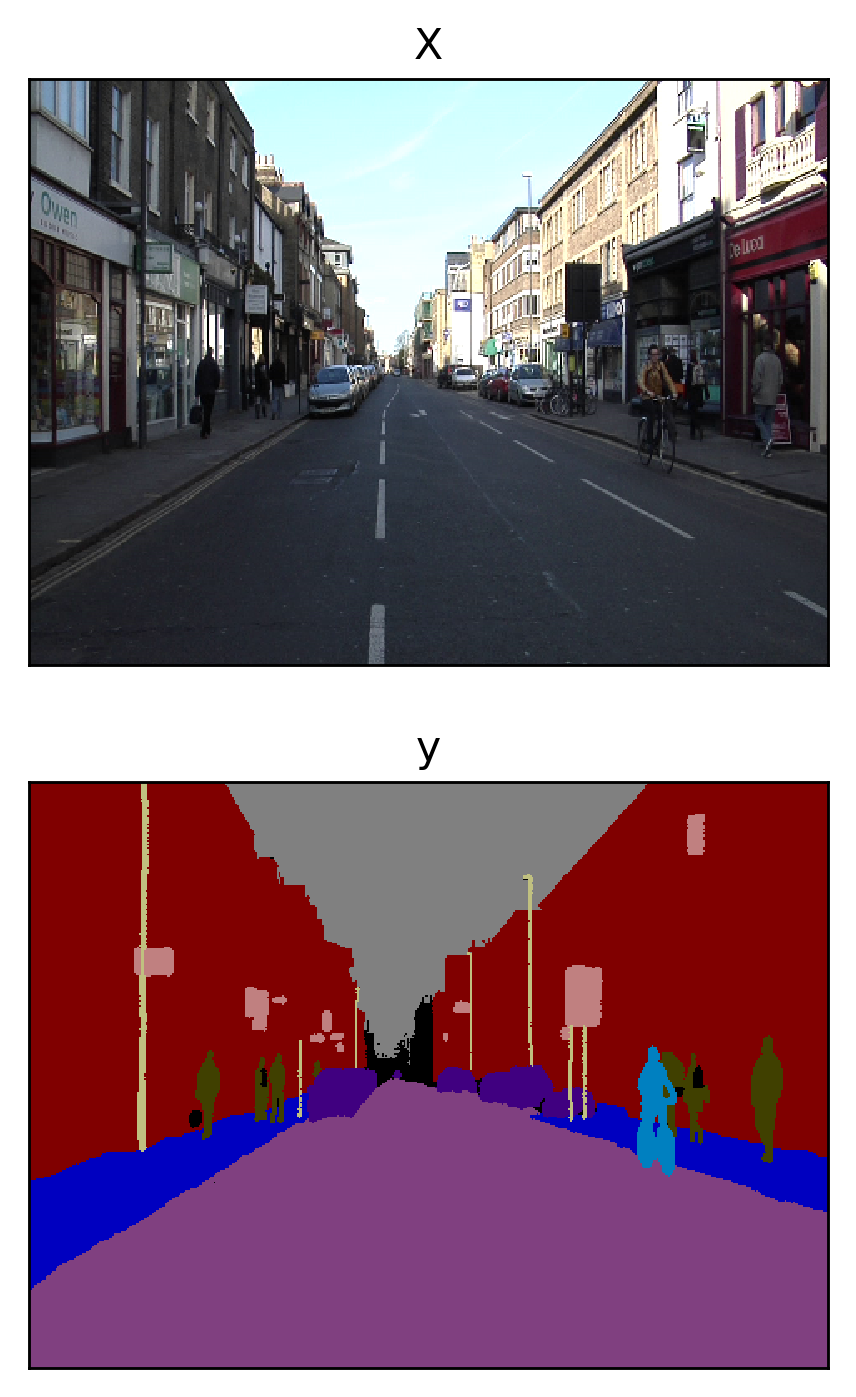

In [5]:
# get the next X, y training tuple
X, y = next(generators['train'])
# transform the onehot vector to an image
y = camvid11.unmap(y)
# plot the images
_ = plot.plot(X=X[0], y=y[0], order=['X', 'y'])

In [6]:
# build the model for the image shape and number of labels
model = epi_approx_tiramisu.epi_approx_tiramisu((*crop_size, 3), camvid11.n, class_weights=camvid11.class_mask)
model.layers[1].load_weights(weights_file)
model.summary()

/users/PMIU0138/miu0212/neural-semantic-segmentation/src/tiramisu/epi_approx_tiramisu.py:72: UserWarning: Output "entropy" missing from loss dictionary. We assume this was done on purpose, and we will not be expecting any data to be passed to "entropy" during training.
  metrics={'tiramisu': [build_categorical_accuracy(weights=class_weights)]},


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 352, 480, 3)       0         
_________________________________________________________________
tiramisu (Model)             (None, 352, 480, 12)      9423116   
_________________________________________________________________
moving_average_1 (MovingAver (None, 352, 480, 12)      0         
_________________________________________________________________
entropy (Entropy)            (None, 352, 480)          0         
Total params: 9,423,116
Trainable params: 9,320,044
Non-trainable params: 103,072
_________________________________________________________________


# Test Metrics

In [7]:
metrics = evaluate.evaluate(model, generators['test'], 233,
    mask=camvid11.class_mask, 
    code_map=camvid11.discrete_to_label_map,
)
metrics

100%|██████████| 233/233 [01:50<00:00,  2.11step/s]


Value
Accuracy                 0.908092
Mean Per Class Accuracy  0.716523
Mean I/U                 0.585788
Bicyclist                0.348390
Building                 0.775576
Car                      0.689861
Column_Pole              0.312898
Fence                    0.261254
Pedestrian               0.429900
Road                     0.918804
Sidewalk                 0.802591
SignSymbol               0.253895
Sky                      0.918060
VegetationMisc           0.732444

In [8]:
print(tabulate(metrics, tablefmt='pipe', headers=('Metric', 'Value')))

| Metric                  |    Value |
|:------------------------|---------:|
| Accuracy                | 0.908092 |
| Mean Per Class Accuracy | 0.716523 |
| Mean I/U                | 0.585788 |
| Bicyclist               | 0.34839  |
| Building                | 0.775576 |
| Car                     | 0.689861 |
| Column_Pole             | 0.312898 |
| Fence                   | 0.261254 |
| Pedestrian              | 0.4299   |
| Road                    | 0.918804 |
| Sidewalk                | 0.802591 |
| SignSymbol              | 0.253895 |
| Sky                     | 0.91806  |
| VegetationMisc          | 0.732444 |


# Qualitative Results

## Train

In [9]:
X, y, p, s = predict.predict_epistemic(model, generators['train'], camvid11)

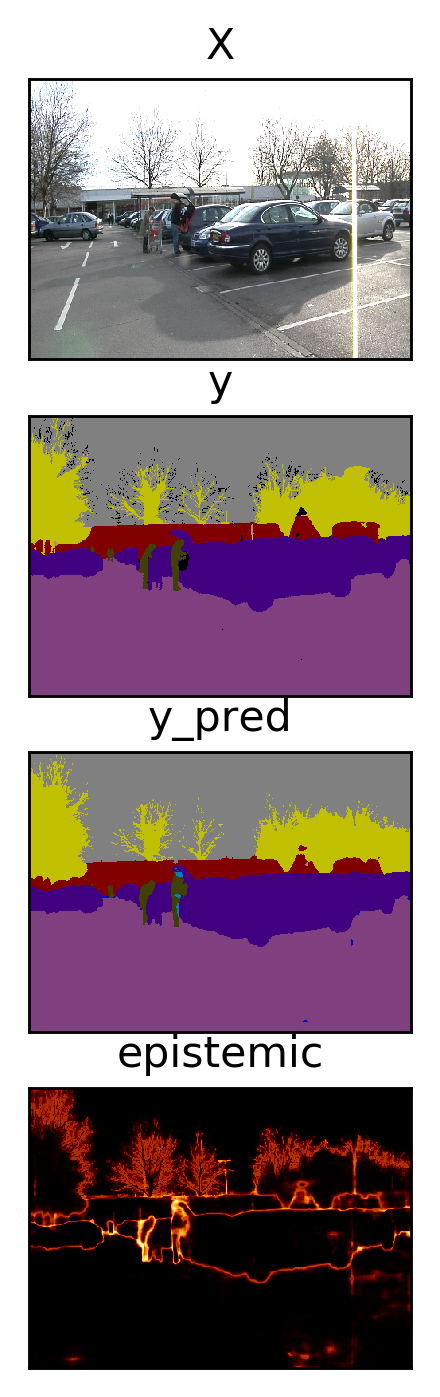

In [10]:
_ = plot.plot(X=X[0], y=y[0], y_pred=p[0], epistemic=s[0], order=['X', 'y', 'y_pred', 'epistemic'])

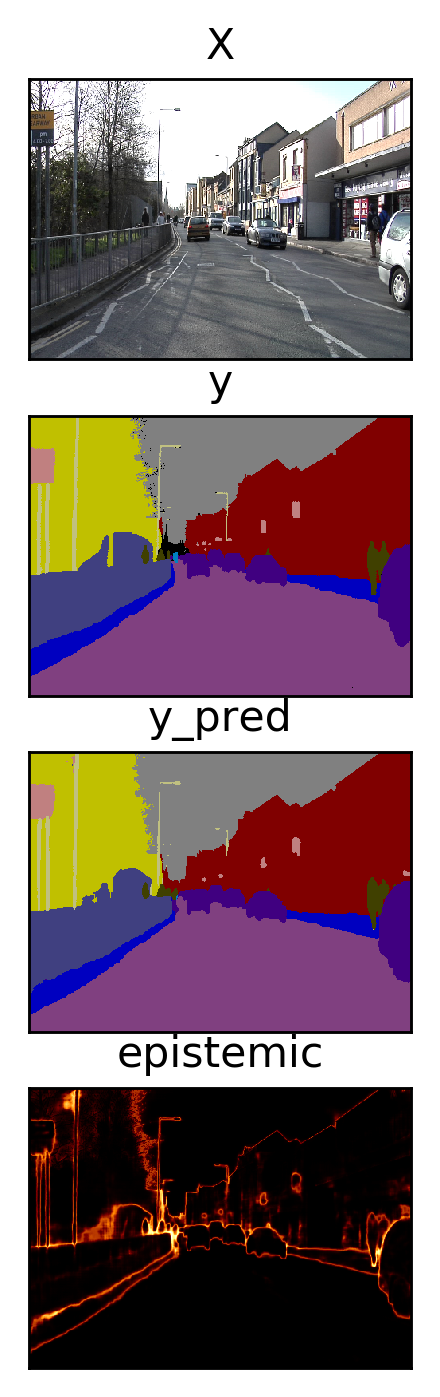

In [11]:
_ = plot.plot(X=X[1], y=y[1], y_pred=p[1], epistemic=s[1], order=['X', 'y', 'y_pred', 'epistemic'])

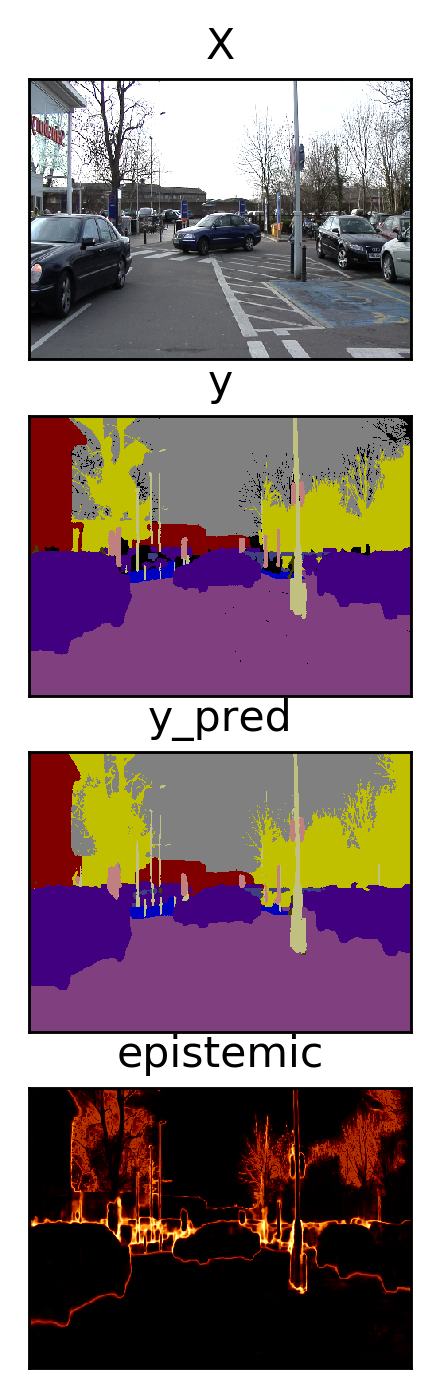

In [12]:
_ = plot.plot(X=X[2], y=y[2], y_pred=p[2], epistemic=s[2], order=['X', 'y', 'y_pred', 'epistemic'])

## Validation

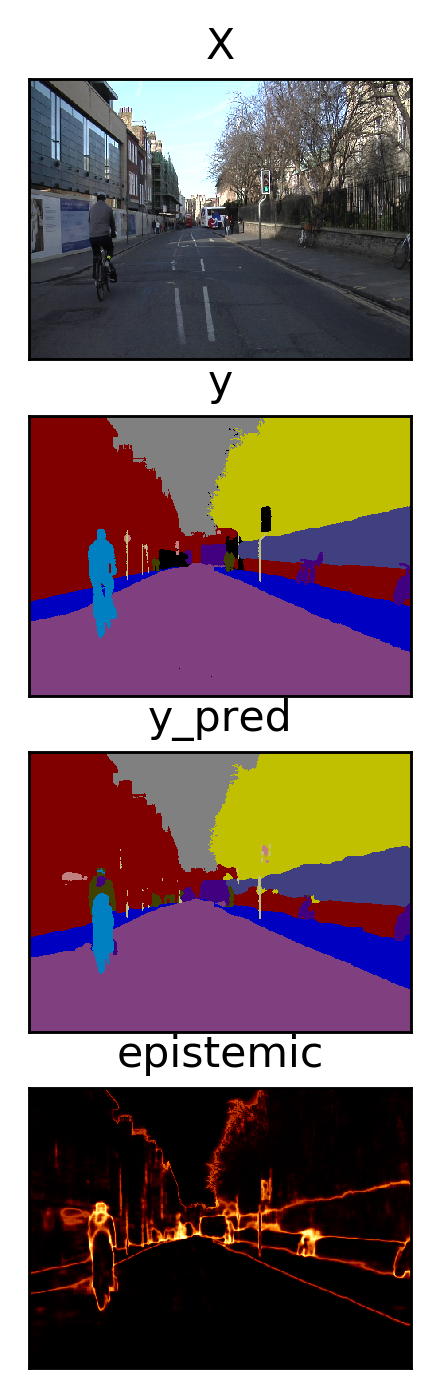

In [13]:
X, y, p, s = predict.predict_epistemic(model, generators['val'], camvid11)
_ = plot.plot(X=X[0], y=y[0], y_pred=p[0], epistemic=s[0], order=['X', 'y', 'y_pred', 'epistemic'])

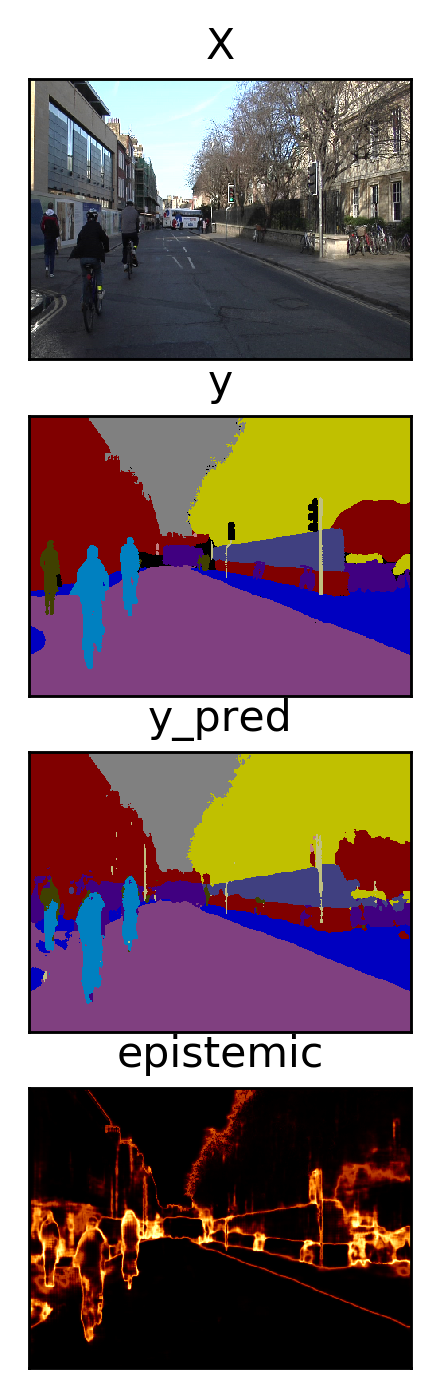

In [14]:
X, y, p, s = predict.predict_epistemic(model, generators['val'], camvid11)
_ = plot.plot(X=X[0], y=y[0], y_pred=p[0], epistemic=s[0], order=['X', 'y', 'y_pred', 'epistemic'])

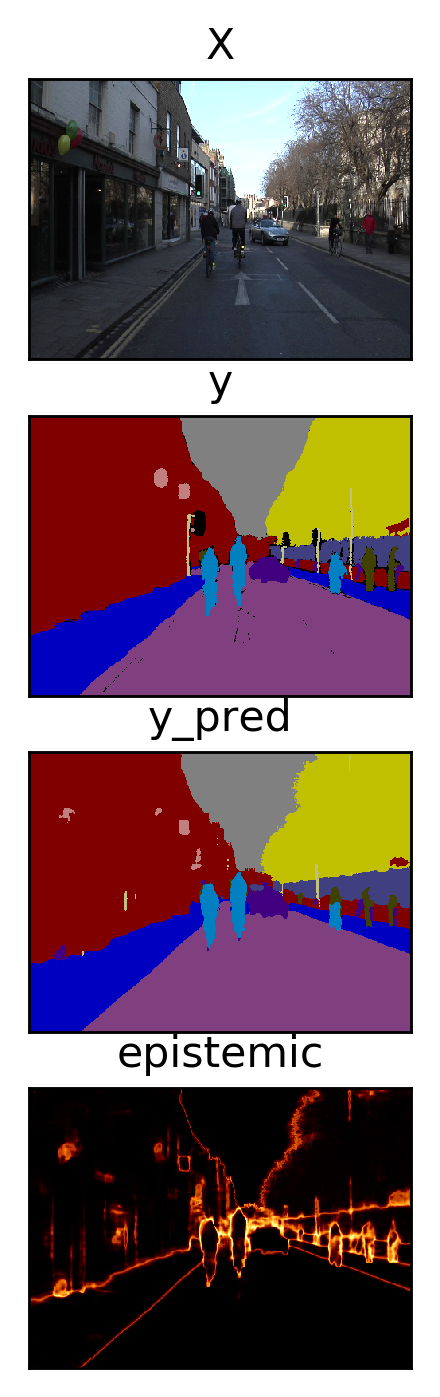

In [15]:
X, y, p, s = predict.predict_epistemic(model, generators['val'], camvid11)
_ = plot.plot(X=X[0], y=y[0], y_pred=p[0], epistemic=s[0], order=['X', 'y', 'y_pred', 'epistemic'])

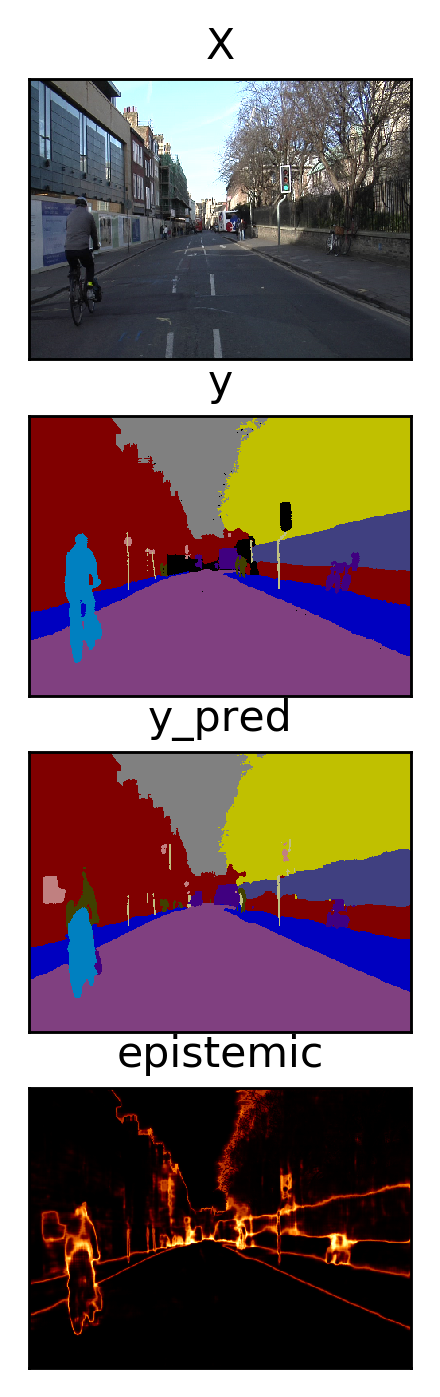

In [16]:
X, y, p, s = predict.predict_epistemic(model, generators['val'], camvid11)
_ = plot.plot(X=X[0], y=y[0], y_pred=p[0], epistemic=s[0], order=['X', 'y', 'y_pred', 'epistemic'])

## Test

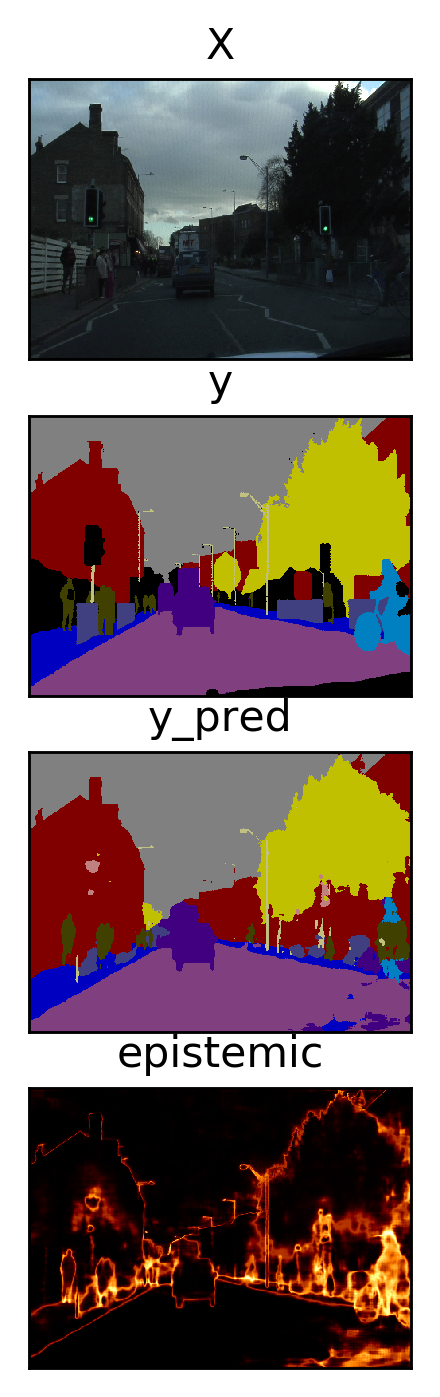

In [17]:
X, y, p, s = predict.predict_epistemic(model, generators['test'], camvid11)
fig = plot.plot(X=X[0], y=y[0], y_pred=p[0], epistemic=s[0], order=['X', 'y', 'y_pred', 'epistemic'])
fig.savefig('img/tiramisu-bayesian/epistemic-approx/0.png', transparent=True, bbox_inches='tight')

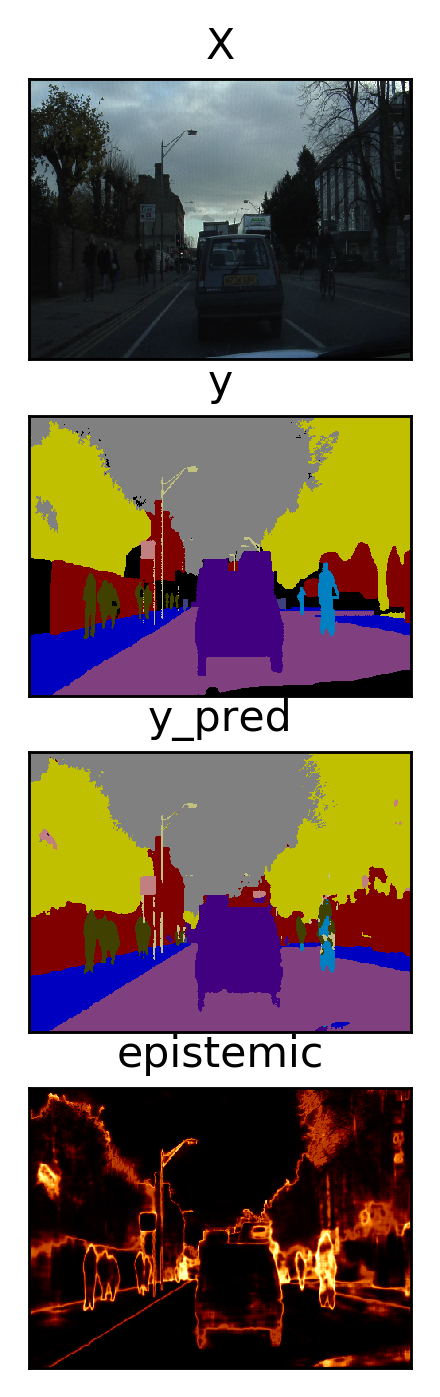

In [18]:
X, y, p, s = predict.predict_epistemic(model, generators['test'], camvid11)
fig = plot.plot(X=X[0], y=y[0], y_pred=p[0], epistemic=s[0], order=['X', 'y', 'y_pred', 'epistemic'])
fig.savefig('img/tiramisu-bayesian/epistemic-approx/1.png', transparent=True, bbox_inches='tight')

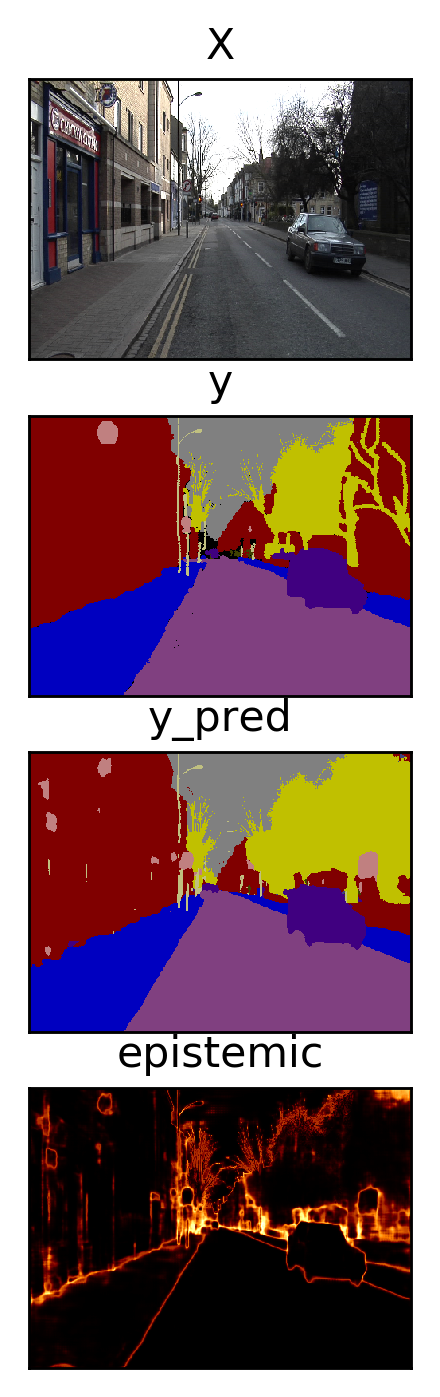

In [19]:
X, y, p, s = predict.predict_epistemic(model, generators['test'], camvid11)
fig = plot.plot(X=X[0], y=y[0], y_pred=p[0], epistemic=s[0], order=['X', 'y', 'y_pred', 'epistemic'])
fig.savefig('img/tiramisu-bayesian/epistemic-approx/2.png', transparent=True, bbox_inches='tight')

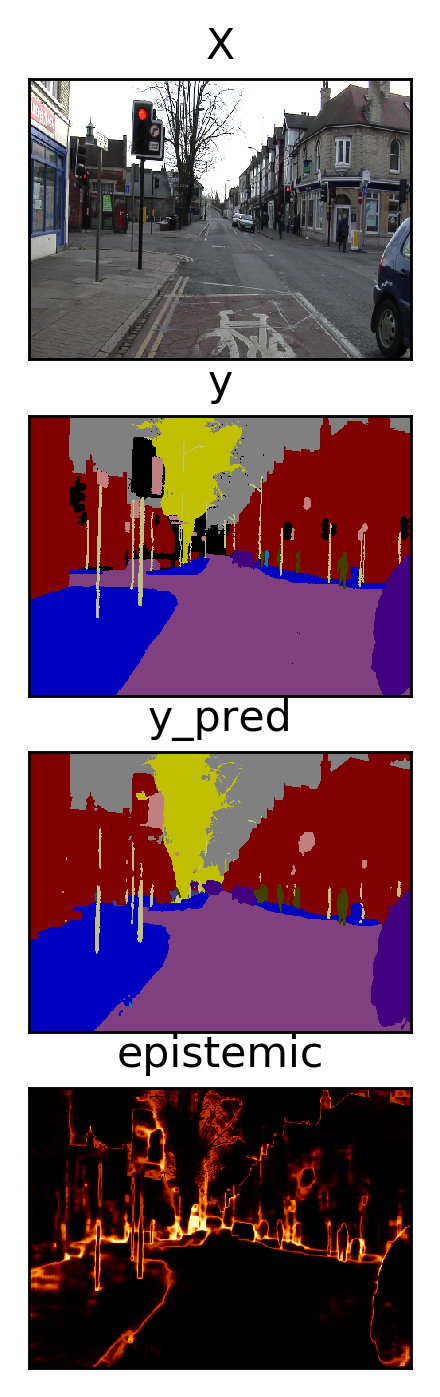

In [20]:
X, y, p, s = predict.predict_epistemic(model, generators['test'], camvid11)
fig = plot.plot(X=X[0], y=y[0], y_pred=p[0], epistemic=s[0], order=['X', 'y', 'y_pred', 'epistemic'])
fig.savefig('img/tiramisu-bayesian/epistemic-approx/3.png', transparent=True, bbox_inches='tight')

# Video

In [21]:
video_file = '0005VD.mp4'
video_path = camvid.videos.abs_path(video_file)
out_path = 'img/tiramisu-bayesian/epistemic-approx/{}'.format(video_file)

In [22]:
predict_video.predict_video(video_path, out_path, camvid11, model, predict.predict_epistemic)

100%|██████████| 6600/6600 [26:53<00:00,  4.09it/s]
